# Часть 1

Для выборки объема 50. Предполагая, что она взята из нормального распределения $N_{a,σ^2}$,
1. Построить точный доверительный интервал уровня доверия $1−\varepsilon$
    * для параметра $a$ при известном $σ^2$.

    * для параметра $a$ при неизвестном $σ^2$.

    * для параметра $σ^2$ при известном $a$.

    * для параметра $σ^2$ при неизвестном $a$.

2. Считая первые 20 чисел (2 строки) и следующие 30 чисел (3 строки) двумя независимыми выборками из нормального распределения, проверить гипотезу однородности (по критериям Фишера и Стьюдента).

In [3]:
import numpy as np
import scipy
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
a = 1.0
sigma2 = 0.5
eps = 0.13
n = 50

In [23]:
data1 = [
    0.159, -0.085, 0.067, 2.318, 1.636, 0.336, 1.652, 0.552, 1.188, 0.364,
    0.395, -0.076, 0.653, 1.223, 1.501, 0.739, 0.642, 0.770, 0.987, 0.243,
    
    0.545, 1.148, 0.693, 1.496, 0.973, 2.051, 1.230, 1.743, 0.700, 1.030,
    0.761, 2.822, 0.953, 0.534, 1.430, 0.751, 0.813, 1.788, 0.480, 0.430,
    1.810, 0.811, 1.280, 1.859, 0.882, 0.665, 1.381, 1.670, 0.173, 0.432
]

data1 = np.array(data1)

для параметра $a$ при известном $σ^2$

$\frac{\sqrt{n} \left(\overline{X} - a\right)}{\sigma}  \in  N_{0,1}$

$P(-\tau_{1 - \frac{\varepsilon}{2}} < \frac{\sqrt{n}\left(\overline{X} - a\right)}{\sigma} < \tau_{1 - \frac{\varepsilon}{2}}) = 1-\varepsilon \rightarrow P(\overline{X} - \sigma\frac{\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}} < a < \overline{X} + \sigma\frac{\tau_{1 - \frac{\varepsilon}2}}{\sqrt{n}}) = 1 -\varepsilon
$

In [24]:
X_mean = np.mean(data1)
tau = np.abs(stats.norm.ppf(1 - eps / 2))
bias = tau * np.sqrt(sigma2) / np.sqrt(n)
left = X_mean - bias
right = X_mean + bias
print('confidence interval: ({},' ' {})'.format(left, right))

confidence interval: (0.8205498112380716, 1.1233701887619283)


для параметра $a$ при неизвестном $σ^2$

$\frac{\sqrt{n}\left(\overline{X} - a\right)}{S_{0}} \in T_{n-1}$

$P(-\tau_{1 - \frac{\varepsilon}{2}} < \frac{\sqrt{n}(\overline{X} - a)}{S_{0}}  < \tau_{1 - \frac{\varepsilon}{2}}) = 1-\varepsilon \rightarrow P(\overline{X} - S_0\frac{\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}} < a < \overline{X} + S_0\frac{\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}}) = 1 -\varepsilon$

In [25]:
S0 = np.std(data1) * (np.sqrt(n) / np.sqrt(n - 1))
tau = np.abs(stats.t.ppf(df = n - 1, q = 1 - eps / 2))
bias = tau * S0 / np.sqrt(n)
left = X_mean - bias
right = X_mean + bias
print('confidence interval: ({},' ' {})'.format(left, right))

confidence interval: (0.8334121361083036, 1.1105078638916963)


для параметра $σ^2$ при известном $a$

$S_1^2 = \frac{1}{n}\sum_{i=1}^n(X_i - a)^2, \, \frac{n S_1^2}{\sigma^2} \in \chi_n^2$

$P( \frac{nS_1^2}{\tau_{1 - \frac{\varepsilon}{2}}} < {\sigma^2} < \frac{nS_1^2}{\tau_{\frac{\varepsilon}{2}}}) = 1-\varepsilon$

In [28]:
S1 = ((data1 - a) ** 2).sum()
q1 = stats.chi2(df = n).ppf(1 - eps / 2)
q2 = stats.chi2(df = n).ppf(eps / 2)
left = S1 / q1
right = S1 / q2
print('confidence interval: ({},' ' {})'.format(left, right))

confidence interval: (0.30141703571811557, 0.5550576706411183)


для параметра $σ^2$ при неизвестном $a$

$\frac{(n-1)S_0^2}{\sigma^2} \in \chi_{n-1}^2$

$P(\frac{(n-1)S_0^2}{\tau_{1 - \frac{\varepsilon}{2}}} < \sigma^2 < \frac{(n-1)S_0^2}{\tau_{\frac{\varepsilon}{2}}}) =  P(\frac{nS^2}{\tau_{1 - \frac{\varepsilon}{2}}} < \sigma^2 < \frac{nS^2}{\tau_{1 - \frac{\varepsilon}{2}}})= 1-\varepsilon$

In [29]:
S = np.std(data1) ** 2
q1 = stats.chi2(df = n - 1).ppf(1 - eps / 2)
q2 = stats.chi2(df = n - 1).ppf(eps / 2)
left = n * S / q1
right = n * S / q2
print('confidence interval: ({},' ' {})'.format(left, right))

confidence interval: (0.30617585552715576, 0.5673850227811591)


 Критерий Фишера предназначен для проверки гипотезы $H_0 = \{\sigma_1 = \sigma_2\}$.


$\rho(\vec{X}, \vec{Y}) = \frac{S_0^2(\vec{X})}{S_0^2(\vec{Y})} \in F_{n-1, m-1}$. Удобно, когда $\rho > 1$.


$\delta(\vec{X}, \vec{Y}) = 0$, если $\rho(\vec{X}, \vec{Y}) < f_{1 - \varepsilon}$, и $1$ иначе.


In [30]:
subdata1 = data1[:20]
n1 = 20
subdata2 = data1[20:]
n2 = 30

s1 = n1 / (n1 - 1) * np.std(subdata1) ** 2
s2 = n2 / (n2 - 1) * np.std(subdata2) ** 2

if(s1 < s2):
    first, second = second, first
    n1, n2 = n2, n1
    s1, s2 = s2, s1
res = s1 / s2

In [31]:
res

1.1894024512385928

In [37]:
stats.f(n1 - 1, n2 - 1).ppf(1 - eps)

1.5801359789463199

In [39]:
if(res < stats.f(n1 - 1, n2 - 1).ppf(1 - eps)):
    print('приняли')
else:
    print('отвергли')

приняли


Проверяется сложная гипотеза $H_0 = \{a_1 = a_2\}$

$\rho(\vec{X},\vec{Y}) = \sqrt{\frac{nm}{n+m}} \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{(n - 1)S_0^2(\vec{X})+(m - 1)S_0^2(\vec{Y})}{n+m-2}}}$

$\delta(\vec{X}, \vec{Y})$ отвергает $H_0$, если  $|\rho(\vec{X}, \vec{Y})|  > \tau_{1 - \frac{\varepsilon}{2}}$ --- квантиль соответствующего уровня распределения $T_{n+m-2}$

In [42]:
s01 = s1 * (n1 - 1)
s02 = s2 * (n2 - 1)
rho = np.sqrt(n1 * n2 / (n1 + n2)) * (np.mean(subdata1) - np.mean(subdata2)) / np.sqrt((s01 + s02) / (n1 + n2 - 2))
if(abs(rho) < stats.t(n1 + n2 - 2).ppf(1 - eps / 2)):
    print('приняли')
else:
    print('отвергли')

отвергли


In [43]:
abs(rho)

1.94786077339211

In [44]:
stats.t(n1 + n2 - 2).ppf(1 - eps / 2)

1.5405236630149093

# Часть 2.
Дана выборка объема 30 из неизвестного распределения.
1. Построить эмпирическую функцию распределения и гистограмму.
2. Проверить по критерию Колмогорова гипотезу о том, что выборка взята из равномерного распределения. Найти реально достигнутый уровень значимости.
3. Проверить ту же гипотезу по критерию $\chi^2$. Найти реально достигнутый уровень значимости.

In [45]:
data2 = [
    0.196, 0.004, 0.891, 0.431, 0.248, 0.141, 0.079, 0.503, 0.361, 0.990,
    0.274, 0.792, 0.241, 0.881, 0.837, 0.420, 0.829, 0.968, 0.554, 0.137,
    0.733, 0.345, 0.896, 0.069, 0.160, 0.627, 0.616, 0.116, 0.068, 0.666
]

data2 = np.array(data2)

## Построить эмпирическую функцию распределения и гистограмму.

In [82]:
def empirical_cdf(samples):
    samples = np.sort(samples)
    n = len(samples)
    plt.figure(figsize=(8, 8))
    values_sample = np.unique(samples, return_counts=True)
    
    x_arr = np.array(values_sample[0])
    y_arr = values_sample[1] / n
    y_arr = np.cumsum(y_arr)
    
    if 0 not in x_arr:
        x_arr = np.hstack(([0], x_arr))
        y_arr = np.hstack(([0], y_arr))
    
    if 1 not in x_arr:
        x_arr = np.hstack((x_arr, [1]))
        y_arr = np.hstack((y_arr, [1]))
    
    plt.step(x_arr, y_arr, where='post', label='Empirical cdf')
    plt.xlabel('x')
    plt.legend()

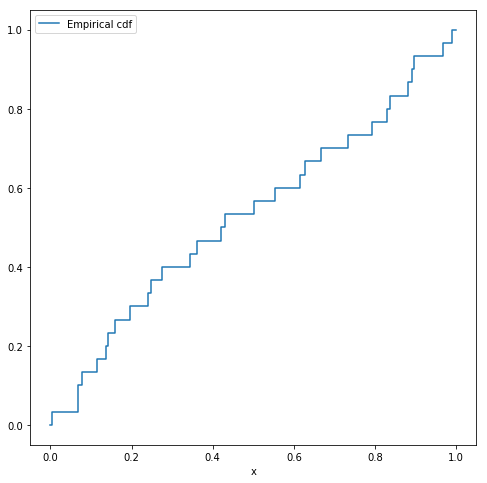

In [83]:
empirical_cdf(data2)

In [92]:
hist, bin_edges = np.histogram(data2, density=True)

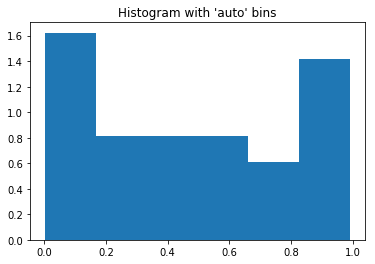

In [102]:
plt.hist(sorted(data2), bins='auto', density=True)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

## Проверить по критерию Колмогорова гипотезу о том, что выборка взята из равномерного распределения. Найти реально достигнутый уровень значимости.

$\rho(\vec{X}) = \sqrt{n} \ sup_y  \ |F_{n}^*(y) - F(y)| \Rightarrow \eta \in K(y)$


$\delta(\vec{X}) = H_1$, если $\rho(\vec{X}) < C$, и $H_2$ иначе.

In [107]:
def kolm_rho(samples):
    samples = np.sort(samples)
    n = len(samples)
    values_sample = np.unique(samples, return_counts=True)
    
    x_arr = np.array(values_sample[0])
    y_arr = values_sample[1] / n
    y_arr = np.cumsum(y_arr)
    
    if 0 not in x_arr:
        x_arr = np.hstack(([0], x_arr))
        y_arr = np.hstack(([0], y_arr))
    
    if 1 not in x_arr:
        x_arr = np.hstack((x_arr, [1]))
        y_arr = np.hstack((y_arr, [1]))
        
    return np.sqrt(n) * np.max(np.abs(y_arr - x_arr))

http://smc.edu.nstu.ru/krit_kolm.htm

In [109]:
kolm_rho(data2)

0.690130422456509

In [108]:
C = 1.25

if kolm_rho(data2) < C:
    print('приняли')
else:
    print('отвергли')

приняли


$РДУЗ = P(\eta \geq \rho)$

0,7278

## Проверить ту же гипотезу по критерию $\chi^2$. Найти реально достигнутый уровень значимости.

$ \rho(\vec{X}) = \sum_{j=1}^{k} \frac{(\nu_j -  np_j)^2}{np_j} \Rightarrow H_{k-1}$

$\delta(\vec{X}) = H_1$, если $\rho(\vec{X}) < C$, и $H_2$ иначе.

In [115]:
def chi2_rho(samples, bins):   
    p_arr = []
    for i in range(len(bins)-1):
        p_arr += [bins[i + 1] - bins[i]]
    p_arr = np.array(p_arr)
    
    samples = np.sort(samples)
    n = len(samples)
    nu_arr = np.zeros(len(p_arr))
    
    for i in range (len(samples)):
        for j in range(len(bins) - 1):
            if(bins[j] <= samples[i] and samples[i] < bins[j + 1]):
                nu_arr[j] += 1
    
    res = (nu_arr - p_arr * n) ** 2
    res = res / (p_arr * n)
    
    return np.sum(res)

In [120]:
chi2 = stats.chi2(df=29).ppf(1 - eps)
C = chi2
print('C = ', C)

C =  37.66362548085294


In [142]:
borders = np.linspace(0.0, 1.0, num=10)

In [146]:
rho_ = chi2_rho(data2, borders)
rho_

3.599999999999998

In [144]:
if chi2_rho(data2, borders) < C:
    print('приняли')
else:
    print('отвергли')  

приняли


$РДУЗ = P(\eta \geq \rho) = 1 - F(\rho)$

In [147]:
1 - stats.chi2(df=29).cdf(rho_)

0.9999999971942012